In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


-------------------------


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

## EDA

In [3]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
df_num= train[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat= train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

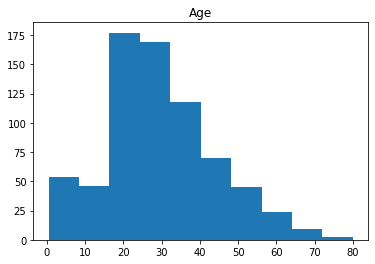

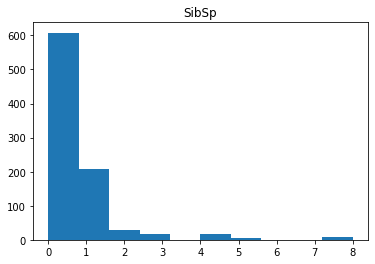

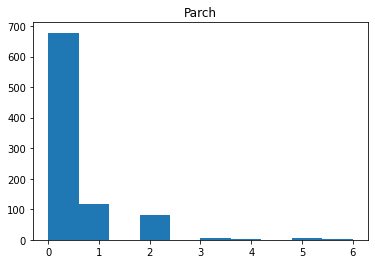

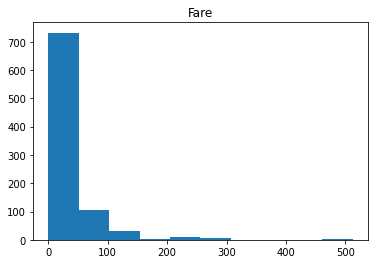

In [9]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

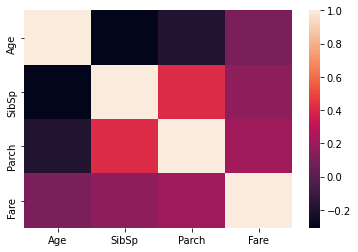

In [10]:
print (df_num.corr())
sns.heatmap(df_num.corr())

In [11]:
pd.pivot_table(train, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


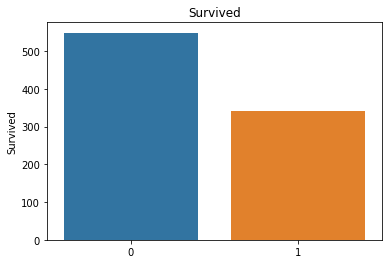

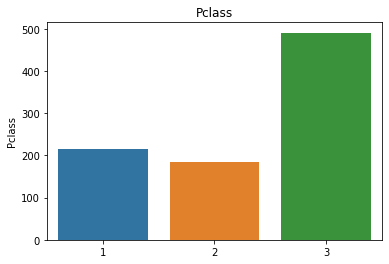

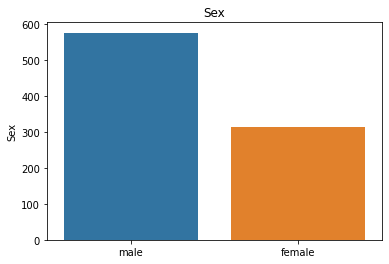

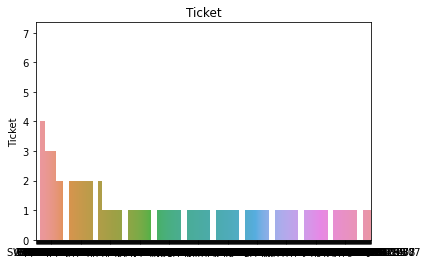

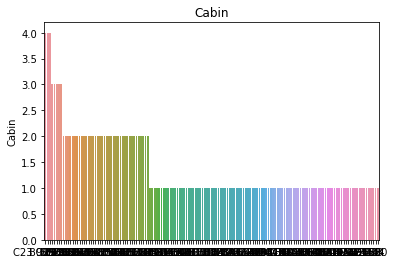

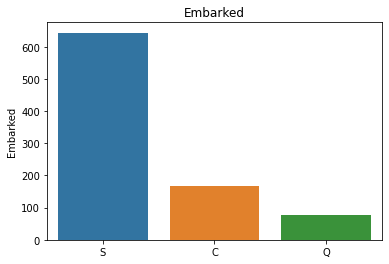

In [12]:
for i in df_cat.columns:
    sns.barplot(df_cat[i]. value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [13]:
print(pd.pivot_table(train, index='Survived', columns='Pclass', values= 'Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index= 'Survived', columns= 'Sex', values= 'Ticket', aggfunc='count'))
print()
print(pd.pivot_table(train, index= 'Survived', columns= 'Embarked', values= 'Ticket', aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [14]:
df_cat.Cabin
train['cabin_multiple']= train.Cabin.apply(lambda x: 0 
                                           if pd.isna(x) 
                                           else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
print(pd.pivot_table(train, index= 'Survived', columns= 'cabin_multiple', values= 'Ticket', aggfunc='count'))

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [16]:
train['cabin_adv']=train.Cabin.apply(lambda x: str(x)[0])

In [17]:
print(train.cabin_adv.value_counts())
pd.pivot_table(train, index= 'Survived', columns='cabin_adv',values='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [18]:
train['numeric_ticket']= train.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
train['ticket_letters']= train.Ticket.apply(lambda x:''.join(x.split(' ')[:-1]).replace ('.',' ').replace('/',' ').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [19]:
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [20]:
pd.set_option("max_rows", None)
train['ticket_letters'].value_counts()

0             665
pc             60
c a            27
ston o2        18
a 5            10
a 5             9
sc paris        9
w  c            9
ca              8
soton o q       8
soton oq        7
ca              6
c               5
f c c           5
s o c           5
s o  p p        3
a 4             3
a 4             3
pp              3
p pp            2
we p            2
sc ah           2
soton o2        2
a  5            2
s c  paris      2
fa              1
sc              1
sw pp           1
s w  pp         1
so c            1
a s             1
c a  soton      1
a4              1
w e p           1
w c             1
sco w           1
s o p           1
f c             1
sc ahbasle      1
s p             1
s c  a 4        1
Name: ticket_letters, dtype: int64

In [21]:
pd.pivot_table(train,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [22]:
pd.pivot_table(train,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a 5,a 4,a 4,a 5,a 5,a s,a4,c,c a,...,so c,soton o q,soton o2,soton oq,ston o2,sw pp,w c,w c,w e p,we p
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,2.0,3.0,3.0,9.0,8.0,1.0,1.0,3.0,14.0,...,NaN,7.0,2.0,6.0,10.0,NaN,8.0,1.0,1.0,1.0
1,255.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,13.0,...,1.0,1.0,NaN,1.0,8.0,1.0,1.0,NaN,NaN,1.0


In [23]:
train.Name.head(50)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [24]:
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Mme               1
Sir               1
Jonkheer          1
the Countess      1
Don               1
Ms                1
Capt              1
Name: name_title, dtype: int64

In [25]:
print(pd.pivot_table(train, index= 'Survived', columns= 'name_title', values= 'Ticket', aggfunc='count'))

name_title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

name_title  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                   
0           NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1           1.0   81.0  99.0  1.0  NaN  1.0           1.0  


## Feature Engineering

In [26]:
#create all categorical variables that we did above for both training and test sets 
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

test['cabin_multiple'] = test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
test['cabin_adv'] = test.Cabin.apply(lambda x: str(x)[0])
test['numeric_ticket'] = test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
train.Age = train.Age.fillna(train.Age.median())
test.Age = test.Age.fillna(train.Age.median())
train.Fare = train.Fare.fillna(train.Fare.median())
test.Fare = test.Fare.fillna(train.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
train.dropna(subset=['Embarked'],inplace = True)

#log norm of sibsp
train['norm_sibsp'] = np.log(train.SibSp+1)
test['norm_sibsp'] = np.log(test.SibSp+1)


# log norm of fare (used)
train['norm_fare'] = np.log(train.Fare+1)
test['norm_fare'] = np.log(test.Fare+1)

# converted fare to category for pd.get_dummies()
train.Pclass = train.Pclass.astype(str)
test.Pclass = test.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
train_dummies = pd.get_dummies(train[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])
test_dummies = pd.get_dummies(test[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])

In [27]:
# Scale data 
scale = StandardScaler()
X_train_scaled = train_dummies.copy()
X_test_scaled = train_dummies.copy()

X_train_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(X_train_scaled[['Age','SibSp','Parch','norm_fare']])
X_test_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(X_test_scaled[['Age','SibSp','Parch','norm_fare']])

In [28]:
y_train = train['Survived']
y_train.shape

(889,)

## Build Models

In [29]:
#load models 
lr = LogisticRegression(max_iter = 2000)
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
KNN = KNeighborsClassifier()
GNB = GaussianNB()

In [30]:
#fit models
lr.fit(X_train_scaled, y_train)
LDA.fit(X_train_scaled, y_train)
QDA.fit(X_train_scaled, y_train)
GNB.fit(X_train_scaled, y_train)
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [31]:
#Create random classifier line for ROC and precision/recall curves
rnd_probs = [0 for _ in range(len(y_train))]
# calculate scores
rnd_auc = roc_auc_score(y_train, rnd_probs)
# calculate roc curves
rnd_fpr, rnd_tpr, _ = roc_curve(y_train, rnd_probs)
# calculate the random classifier line as the proportion of the positive class
rnd = len(y_train[y_train==1]) / len(y_train)

## Logistic Regression

In [32]:
cv = cross_val_score(lr,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.80898876 0.84269663 0.76404494 0.86516854 0.82022472 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
0.8268130745658835


In [33]:
# predict probabilities for logistic regression
lr_probs = lr.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

Random Classifier: ROC AUC=0.500
Logistic Regression: ROC AUC=0.882


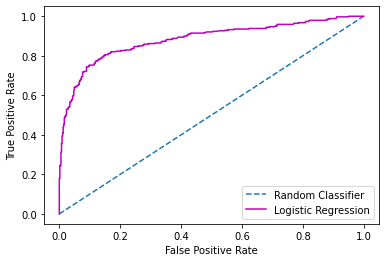

In [34]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(lr_fpr, lr_tpr, marker='', label='Logistic Regression', color = 'm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

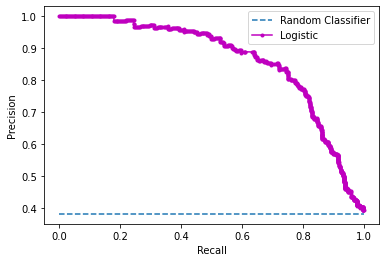

Logistic Regression: PR AUC=0.863


In [35]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, lr_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic', color = 'm')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
lr_pr_score = auc(recall, precision)
print('Logistic Regression: PR AUC=%.3f' % (lr_pr_score))

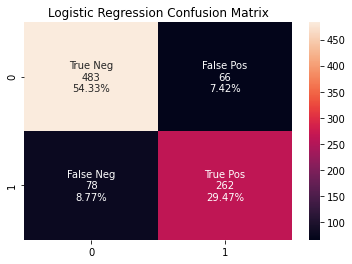

In [36]:
y_preds = lr.predict(X_train_scaled)
lr_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in lr_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in lr_matrix.flatten()/np.sum(lr_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_matrix, annot=labels, fmt='')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

#### Logistic regression is a stable model. The ROC and Precision score is relatively close. This is supported due to the False positive and False negative scores having close percentages.

## Linear Discriminant Analysis

In [37]:
cv = cross_val_score(LDA ,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.7752809  0.84269663 0.7752809  0.86516854 0.84269663 0.82022472
 0.82022472 0.79775281 0.87640449 0.85227273]
0.8268003064351378


In [38]:
# predict probabilities for logistic regression
lda_probs = LDA.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
lda_probs = lda_probs[:,1]
# calculate scores
lda_auc = roc_auc_score(y_train, lda_probs)
lda_fpr, lda_tpr, _ = roc_curve(y_train, lda_probs)

Random Classifier: ROC AUC=0.500
Linear Discriminant Analysis: ROC AUC=0.883


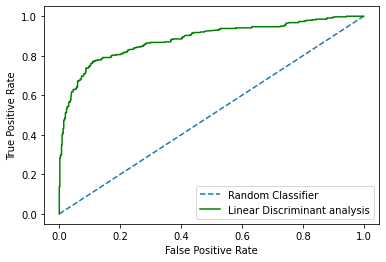

In [39]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('Linear Discriminant Analysis: ROC AUC=%.3f' % (lda_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(lda_fpr, lda_tpr, marker='', label='Linear Discriminant analysis', color = 'g')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

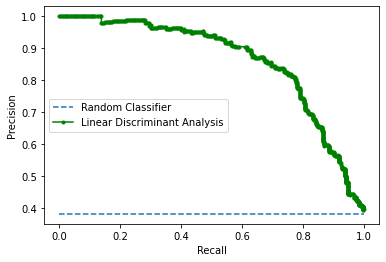

Linear Discriminant Analysis: PR AUC=0.863


In [40]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, lda_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Linear Discriminant Analysis', color = 'g')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
lda_pr_score = auc(recall, precision)
print('Linear Discriminant Analysis: PR AUC=%.3f' % (lda_pr_score))

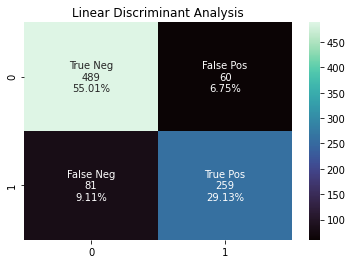

In [41]:
y_preds = LDA.predict(X_train_scaled)
lda_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in lda_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in lda_matrix.flatten()/np.sum(lda_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lda_matrix, annot=labels, fmt='', cmap='mako')
plt.title('Linear Discriminant Analysis')
plt.show()

#### LDA produced similar metric scores to the logistic regression model. The LDA model slightly increased the true negative and false negative percentages. The difference in score was moved from true positive and false positves respectively.

## Quadratic Discriminant analysis

In [42]:
cv = cross_val_score(QDA ,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.62921348 0.69662921 0.68539326 0.62921348 0.73033708 0.71910112
 0.7752809  0.61797753 0.76404494 0.70454545]
0.6951736465781411


In [43]:
# predict probabilities for logistic regression
qda_probs = QDA.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
qda_probs = qda_probs[:,1]
# calculate scores
qda_auc = roc_auc_score(y_train, qda_probs)
qda_fpr, qda_tpr, _ = roc_curve(y_train, qda_probs)

Random Classifier: ROC AUC=0.500
Quadratice Discriminant Analysis: ROC AUC=0.830


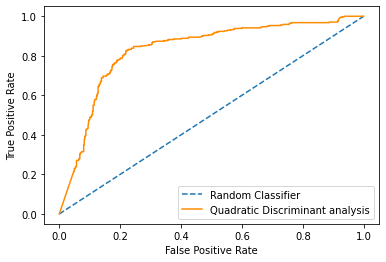

In [44]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('Quadratice Discriminant Analysis: ROC AUC=%.3f' % (qda_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(qda_fpr, qda_tpr, marker='', label='Quadratic Discriminant analysis', color = 'darkorange')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

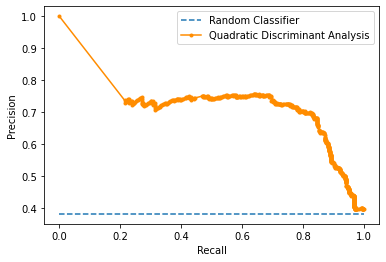

Linear Discriminant Analysis: PR AUC=0.730


In [45]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, qda_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Quadratic Discriminant Analysis', color = 'darkorange')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
qda_pr_score = auc(recall, precision)
print('Linear Discriminant Analysis: PR AUC=%.3f' % (qda_pr_score))

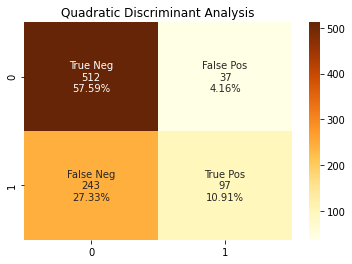

In [46]:
y_preds = QDA.predict(X_train_scaled)
qda_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in qda_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in qda_matrix.flatten()/np.sum(qda_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(qda_matrix, annot=labels, fmt='', cmap='YlOrBr')
plt.title('Quadratic Discriminant Analysis')
plt.show()

#### QDA perfromed worse than LDA. The seperation of  covariance features shifted result predictions from the false postive and true positives into true and false negatives. In this situation the slightly correlated features are important in identifying the dependent variable.

## Naive Bayes

In [47]:
cv = cross_val_score(GNB,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.65168539 0.6741573  0.6741573  0.75280899 0.84269663 0.7752809
 0.79775281 0.69662921 0.76404494 0.73863636]
0.736784984678243


In [48]:
# predict probabilities for logistic regression
gnb_probs = GNB.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:,1]
# calculate scores
gnb_auc = roc_auc_score(y_train, gnb_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_train, gnb_probs)

Random Classifier: ROC AUC=0.500
Naive Bayes: ROC AUC=0.837


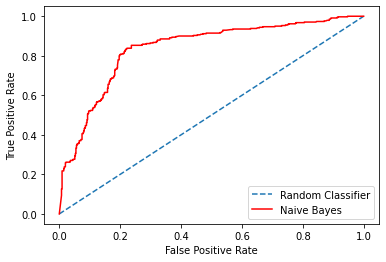

In [49]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('Naive Bayes: ROC AUC=%.3f' % (gnb_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(gnb_fpr, gnb_tpr, marker='', label='Naive Bayes', color = 'r')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

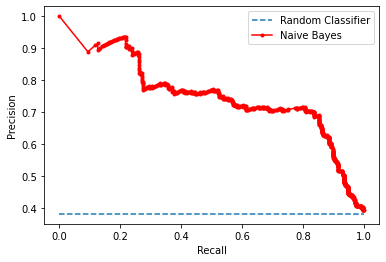

Naive Bayes: PR AUC=0.755


In [50]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, gnb_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Naive Bayes', color = 'r')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
gnb_pr_score = auc(recall, precision)
print('Naive Bayes: PR AUC=%.3f' % (gnb_pr_score))

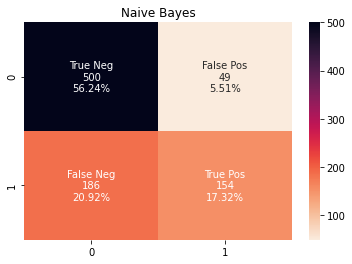

In [51]:
y_preds = GNB.predict(X_train_scaled)
gnb_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in gnb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in gnb_matrix.flatten()/np.sum(gnb_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(gnb_matrix, annot=labels, fmt='', cmap='rocket_r')
plt.title('Naive Bayes')
plt.show()

#### The GNB model is generally a result of the distribution of the data. The GNB creates predictions based on the class means. The difference between the GNB scores and a perfect result are due to the observations that do not perfectly match the normal distribution.

## KNearest Neighbor

In [52]:
cv = cross_val_score(KNN,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.7752809  0.84269663 0.75280899 0.84269663 0.85393258 0.83146067
 0.80898876 0.79775281 0.87640449 0.82954545]
0.8211567926455567


In [53]:
# predict probabilities for logistic regression
knn_probs = KNN.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:,1]
# calculate scores
knn_auc = roc_auc_score(y_train, knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_train, knn_probs)

Random Classifier: ROC AUC=0.500
KNearest Neighbor: ROC AUC=0.937


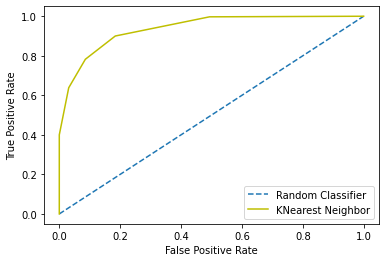

In [54]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('KNearest Neighbor: ROC AUC=%.3f' % (knn_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(knn_fpr, knn_tpr, marker='', label='KNearest Neighbor', color = 'y')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

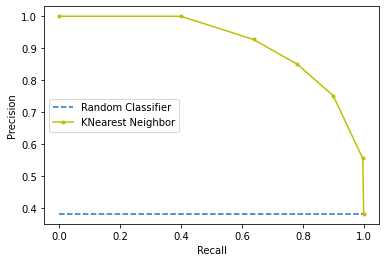

KNearest Neighbor: PR AUC=0.917


In [55]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, knn_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='KNearest Neighbor', color = 'y')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
knn_pr_score = auc(recall, precision)
print('KNearest Neighbor: PR AUC=%.3f' % (knn_pr_score))

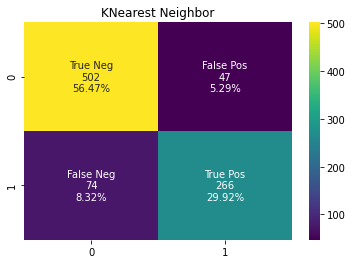

In [56]:
y_preds = KNN.predict(X_train_scaled)
knn_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in knn_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in knn_matrix.flatten()/np.sum(knn_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_matrix, annot=labels, fmt='', cmap='viridis')
plt.title('KNearest Neighbor')
plt.show()

#### KNN Produced the highest precision score amongst the models. This indicates that there is a strong correlation within the data for people who survived. Many people that have the same characteristics will have the same outcome. 

## Submission

In [57]:
len(gender_submission)

418

In [58]:
#Package model for submission
model = lr
y_preds = model.predict(X_test_scaled)
predictions = y_preds[:418]
result_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
result_df.PassengerId = gender_submission.PassengerId
result_df.Survived = predictions

In [59]:
result_df.shape

(418, 2)

In [60]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0


In [61]:
result_df.to_csv('submission.csv', index=False)